# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [ ]:
https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv

In [3]:
pd.read_csv('../../data/chipotle.tsv','\t')

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Assign it to a variable called chipo.

In [4]:
chipo = pd.read_csv('../../data/chipotle.tsv','\t')

### Step 4. See the first 10 entries

In [5]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

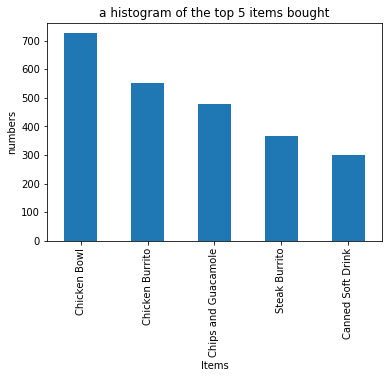

In [28]:
names = chipo.item_name
counts = Counter(names)#计数，看每个名字出现了多少次
df = pd.DataFrame.from_dict(counts,orient='index')
df_s = df[0].sort_values(ascending=False)[:5]#如果by=0,则会出现图例0
df_s.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('numbers')
plt.title('a histogram of the top 5 items bought')
plt.show()

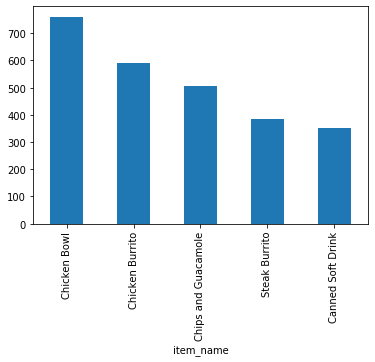

In [9]:
chipo.groupby('item_name').quantity.sum().sort_values(ascending=False)[:5].plot(kind='bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [45]:
# way 2 
dollarizer = lambda x:float(x[1:-1])
price = chipo.item_price.apply(dollarizer)
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


(0, 36.72529433406916)

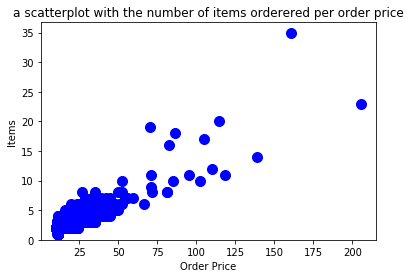

In [64]:
#price = [float(value[1:-1]) for value in chipo.item_price]
chipo['price'] = price
orders = chipo.groupby('order_id').sum()
plt.scatter(x=orders.price,y=orders.quantity,s=100,c='blue')
plt.xlabel('Order Price')
plt.ylabel('Items')
plt.title('a scatterplot with the number of items orderered per order price')
plt.ylim(0)#y轴从0开始

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [ ]:
#根据价钱做频数直方图

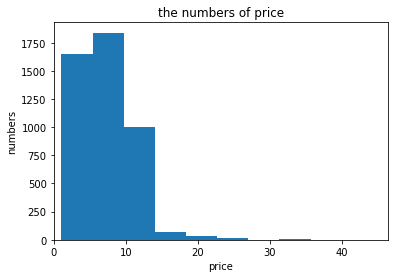

In [75]:
plt.hist(chipo.price)
plt.xlabel('price')
plt.ylabel('numbers')
plt.title('the numbers of price')
plt.xlim(0)
plt.ylim(0)
plt.show()